In [280]:
import pandas as pd
import geopandas as gpd
import unidecode
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from autogluon.tabular import TabularPredictor
from geopy.geocoders import Nominatim
import time
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import KMeans

In [2]:
columnas_diabetes = [
    "Identificador único del municipio",
    "Clave de entidad federativa",
    "Entidad federativa",
    "Clave de municipio o delegación",
    "Municipio o delegación",
    "Estimador",
    "Porcentaje de población de 20 años y más con obesidad.",
    "Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.",
    "Porcentaje de población de 20 años y más con diagnóstico previo de diabetes."
]
df = pd.read_excel("a_peq_prev_2018.xlsx", skiprows=8, header=0, names=columnas_diabetes)

In [3]:
df_diabetes = df[(df['Estimador'] == 'Valor')]

In [4]:
df_diabetes.sort_values(by=["Porcentaje de población de 20 años y más con diagnóstico previo de diabetes."], ascending=False)[:10]

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.
9919,26070,26.0,Sonora,70.0,General Plutarco Elías Calles,Valor,30.184953,27.093073,31.669299
5369,20057,20.0,Oaxaca,57.0,Matías Romero Avendaño,Valor,20.050668,22.911349,26.730224
8629,21138,21.0,Puebla,138.0,San Nicolás de los Ranchos,Valor,21.585144,22.609563,25.661911
1339,08063,8.0,Chihuahua,63.0,Temósachic,Valor,28.318793,29.929828,25.291027
1084,08012,8.0,Chihuahua,12.0,Carichí,Valor,27.478936,29.032866,25.162845
1074,08010,8.0,Chihuahua,10.0,Buenaventura,Valor,24.337591,26.815214,25.144152
1144,08024,8.0,Chihuahua,24.0,Santa Isabel,Valor,22.440758,30.153254,24.831771
7219,20427,20.0,Oaxaca,427.0,Santa María Petapa,Valor,18.996508,22.284445,24.793244
1349,08065,8.0,Chihuahua,65.0,Urique,Valor,24.795828,26.803347,24.380699
5784,20140,20.0,Oaxaca,140.0,San Francisco Chindúa,Valor,13.429771,25.300876,23.303263


In [5]:
columnas_ingreso = ['Entidad federativa', 'Municipio', 'Estimador', 'Ingreso Corriente Promedio Trimestral por Hogar 2020']
df_ingreso = pd.read_excel("icmm_2020_tabulados.xlsx", skiprows=10, header=0, names=columnas_ingreso)

In [6]:
df_ingreso_valor = df_ingreso[(df_ingreso['Estimador'] == 'Valor')]

In [7]:
df_ingreso_valor.sort_values(by=['Ingreso Corriente Promedio Trimestral por Hogar 2020'], ascending=False)[:10]

,Entidad federativa,Municipio,Estimador,Ingreso Corriente Promedio Trimestral por Hogar 2020
4919,19 Nuevo León,019 San Pedro Garza García,Valor,115472.296454
1429,09 Ciudad de México,014 Benito Juárez,Valor,103970.121304
5019,19 Nuevo León,039 Monterrey,Valor,92187.071185
1439,09 Ciudad de México,016 Miguel Hidalgo,Valor,87015.205795
5054,19 Nuevo León,046 San Nicolás de los Garza,Valor,86460.156858
4954,19 Nuevo León,026 Guadalupe,Valor,81922.929219
1434,09 Ciudad de México,015 Cuauhtémoc,Valor,80891.573999
5069,19 Nuevo León,049 Santiago,Valor,80093.130136
1374,09 Ciudad de México,003 Coyoacán,Valor,74356.797700
4854,19 Nuevo León,006 Apodaca,Valor,74179.926761


In [8]:
df_ingreso_valor['Entidad federativa'] = df_ingreso_valor['Entidad federativa'].str.slice(3)
df_ingreso_valor['Municipio'] = df_ingreso_valor['Municipio'].str.slice(3)

C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\4286234904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingreso_valor['Entidad federativa'] = df_ingreso_valor['Entidad federativa'].str.slice(3)
C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\4286234904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingreso_valor['Municipio'] = df_ingreso_valor['Municipio'].str.slice(3)


In [9]:
df_ingreso_valor.sort_values(by=['Ingreso Corriente Promedio Trimestral por Hogar 2020'], ascending=False)[:10]

,Entidad federativa,Municipio,Estimador,Ingreso Corriente Promedio Trimestral por Hogar 2020
4919,Nuevo León,San Pedro Garza García,Valor,115472.296454
1429,Ciudad de México,Benito Juárez,Valor,103970.121304
5019,Nuevo León,Monterrey,Valor,92187.071185
1439,Ciudad de México,Miguel Hidalgo,Valor,87015.205795
5054,Nuevo León,San Nicolás de los Garza,Valor,86460.156858
4954,Nuevo León,Guadalupe,Valor,81922.929219
1434,Ciudad de México,Cuauhtémoc,Valor,80891.573999
5069,Nuevo León,Santiago,Valor,80093.130136
1374,Ciudad de México,Coyoacán,Valor,74356.797700
4854,Nuevo León,Apodaca,Valor,74179.926761


In [10]:
df_diabetes['Municipio'] = df_diabetes['Municipio o delegación'].str.strip().str.upper()
df_diabetes['Entidad federativa'] = df_diabetes['Entidad federativa'].str.strip().str.upper()
df_ingreso_valor['Municipio'] = df_ingreso_valor['Municipio'].str.strip().str.upper()
df_ingreso_valor['Entidad federativa'] = df_ingreso_valor['Entidad federativa'].str.strip().str.upper()

C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\3382727152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['Municipio'] = df_diabetes['Municipio o delegación'].str.strip().str.upper()
C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\3382727152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['Entidad federativa'] = df_diabetes['Entidad federativa'].str.strip().str.upper()
C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\3382727152.py:3: SettingWithCopyWarning: 
A value is trying

In [11]:
df_merged = pd.merge(df_diabetes, df_ingreso_valor, 
                     on=['Municipio', 'Entidad federativa'], 
                     how='inner')

In [12]:
df_merged

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador_x,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Municipio,Estimador_y,Ingreso Corriente Promedio Trimestral por Hogar 2020
0,01001,1.0,AGUASCALIENTES,1.0,Aguascalientes,Valor,31.486541,14.942242,7.495861,AGUASCALIENTES,Valor,62433.124302
1,01002,1.0,AGUASCALIENTES,2.0,Asientos,Valor,32.282284,15.320425,7.953634,ASIENTOS,Valor,41022.527485
2,01003,1.0,AGUASCALIENTES,3.0,Calvillo,Valor,40.004293,13.751906,9.172624,CALVILLO,Valor,48863.528102
3,01004,1.0,AGUASCALIENTES,4.0,Cosío,Valor,32.596450,16.431493,7.383116,COSÍO,Valor,42930.310487
4,01005,1.0,AGUASCALIENTES,5.0,Jesús María,Valor,34.731715,12.356755,6.745819,JESÚS MARÍA,Valor,55616.029998
...,...,...,...,...,...,...,...,...,...,...,...,...
2454,32054,32.0,ZACATECAS,54.0,Villa Hidalgo,Valor,31.075955,16.920279,9.895491,VILLA HIDALGO,Valor,30695.177985
2455,32055,32.0,ZACATECAS,55.0,Villanueva,Valor,30.526273,21.746589,12.050064,VILLANUEVA,Valor,39508.136224
2456,32056,32.0,ZACATECAS,56.0,Zacatecas,Valor,36.822130,20.010453,11.814172,ZACATECAS,Valor,59890.321356
2457,32057,32.0,ZACATECAS,57.0,Trancoso,Valor,32.477646,15.941678,8.089966,TRANCOSO,Valor,35659.580564


In [13]:
df_poblacion = pd.read_excel("INEGI_exporta_24_9_2024_19_56_40.xls")

In [14]:
df_poblacion['Municipio'] = df_poblacion['Municipio'].str.strip().str.upper()
df_poblacion['Entidad federativa'] = df_poblacion['Entidad federativa'].str.strip().str.upper()

In [15]:
df_merged = pd.merge(df_merged, df_poblacion, 
                     on=['Municipio', 'Entidad federativa'], 
                     how='inner')

In [16]:
df_merged

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador_x,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Municipio,Estimador_y,Ingreso Corriente Promedio Trimestral por Hogar 2020,Codigo,Total
0,01001,1.0,AGUASCALIENTES,1.0,Aguascalientes,Valor,31.486541,14.942242,7.495861,AGUASCALIENTES,Valor,62433.124302,01 001,948990
1,01002,1.0,AGUASCALIENTES,2.0,Asientos,Valor,32.282284,15.320425,7.953634,ASIENTOS,Valor,41022.527485,01 002,51536
2,01003,1.0,AGUASCALIENTES,3.0,Calvillo,Valor,40.004293,13.751906,9.172624,CALVILLO,Valor,48863.528102,01 003,58250
3,01004,1.0,AGUASCALIENTES,4.0,Cosío,Valor,32.596450,16.431493,7.383116,COSÍO,Valor,42930.310487,01 004,17000
4,01005,1.0,AGUASCALIENTES,5.0,Jesús María,Valor,34.731715,12.356755,6.745819,JESÚS MARÍA,Valor,55616.029998,01 005,129929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,32054,32.0,ZACATECAS,54.0,Villa Hidalgo,Valor,31.075955,16.920279,9.895491,VILLA HIDALGO,Valor,30695.177985,32 054,19446
2456,32055,32.0,ZACATECAS,55.0,Villanueva,Valor,30.526273,21.746589,12.050064,VILLANUEVA,Valor,39508.136224,32 055,31558
2457,32056,32.0,ZACATECAS,56.0,Zacatecas,Valor,36.822130,20.010453,11.814172,ZACATECAS,Valor,59890.321356,32 056,149607
2458,32057,32.0,ZACATECAS,57.0,Trancoso,Valor,32.477646,15.941678,8.089966,TRANCOSO,Valor,35659.580564,32 057,20455


In [20]:
df_farmacias = pd.read_csv('farmacias_categorizadas.csv')

df_farmacias['municipio'] = df_farmacias['municipio'].str.upper()
df_farmacias['entidad'] = df_farmacias['entidad'].str.upper()
df_farmacias['municipio'].fillna('UNKNOWN', inplace=True)
df_farmacias['entidad'].fillna('UNKNOWN', inplace=True)

C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\1429423385.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_farmacias = pd.read_csv('farmacias_categorizadas.csv')
C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\1429423385.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_farmacias['municipio'].fillna('UNKNOWN', inplace=True)
C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\1429423385.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or S

In [21]:
pharmacy_density = df_farmacias.groupby(['municipio', 'entidad', 'categoria']).size().unstack(fill_value=0)
pharmacy_density.reset_index(inplace=True)

pharmacy_density.head()

categoria,municipio,entidad,Big,Medium,Small
0,ABASOLO,GUANAJUATO,11,5,12
1,ABASOLO,TAMAULIPAS,2,3,1
2,ABEJONES,OAXACA,1,0,0
3,ACACOYAGUA,CHIAPAS,3,3,10
4,ACAJETE,PUEBLA,11,16,14


In [22]:
df_merged['Municipio'] = df_merged['Municipio'].str.upper()
df_merged['Entidad federativa'] = df_merged['Entidad federativa'].str.upper()

df_final = pd.merge(df_merged, pharmacy_density, 
                    left_on=['Municipio', 'Entidad federativa'], 
                    right_on=['municipio', 'entidad'], 
                    how='left')

In [23]:
df_final[['Big', 'Medium', 'Small']] = df_final[['Big', 'Medium', 'Small']].fillna(0)

In [24]:
df_final['Total_Pharmacies'] = df_final['Big'] + df_final['Medium'] + df_final['Small']

df_final['Pharmacy_Density_per_100k'] = (df_final['Total_Pharmacies'] / df_final['Total']) * 100000

df_final[['Municipio', 'Entidad federativa', 'Total', 'Big', 'Medium', 'Small', 'Total_Pharmacies', 'Pharmacy_Density_per_100k']].head()

,Municipio,Entidad federativa,Total,Big,Medium,Small,Total_Pharmacies,Pharmacy_Density_per_100k
0,AGUASCALIENTES,AGUASCALIENTES,948990,136.0,81.0,137.0,354.0,37.302817
1,ASIENTOS,AGUASCALIENTES,51536,2.0,5.0,5.0,12.0,23.284694
2,CALVILLO,AGUASCALIENTES,58250,6.0,2.0,7.0,15.0,25.751073
3,COSÍO,AGUASCALIENTES,17000,2.0,3.0,2.0,7.0,41.176471
4,JESÚS MARÍA,AGUASCALIENTES,129929,11.0,8.0,10.0,29.0,22.319882


In [25]:
df_final_sorted = df_final.sort_values(by='Pharmacy_Density_per_100k', ascending=True)

In [26]:
df_final_sorted[['Municipio', 'Entidad federativa', 'Pharmacy_Density_per_100k', 'Ingreso Corriente Promedio Trimestral por Hogar 2020', 'Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.']]

,Municipio,Entidad federativa,Pharmacy_Density_per_100k,Ingreso Corriente Promedio Trimestral por Hogar 2020,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.
1028,FRESNILLO DE TRUJANO,OAXACA,0.000000,26318.702601,10.428982
252,ROSARIO,CHIHUAHUA,0.000000,32261.534857,12.312630
250,RIVA PALACIO,CHIHUAHUA,0.000000,49464.273884,10.499462
1436,SANTA MARÍA TEMAXCALTEPEC,OAXACA,0.000000,22135.316382,7.557337
1434,SANTA MARÍA TECOMAVACA,OAXACA,0.000000,28463.617902,8.585740
...,...,...,...,...,...
1057,NATIVIDAD,OAXACA,401.606426,40395.222509,9.937796
1318,SAN PEDRO MIXTEPEC,OAXACA,5864.197531,25599.301255,9.428762
1322,SAN PEDRO MIXTEPEC,OAXACA,5864.197531,25599.301255,9.300738
1320,SAN PEDRO MIXTEPEC,OAXACA,5864.197531,37513.399007,9.300738


In [27]:
df_final_sorted.iloc[252]

Identificador único del municipio                                                               20097
Clave de entidad federativa                                                                      20.0
Entidad federativa                                                                             OAXACA
Clave de municipio o delegación                                                                  97.0
Municipio o delegación                                                              San Andrés Solaga
Estimador_x                                                                                     Valor
Porcentaje de población de 20 años y más con obesidad.                                      23.219691
Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.            23.750974
Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.                11.208567
Municipio                                                                         

In [28]:
df_final['Big_Pharmacy_Ratio'] = df_final['Big'] / df_final['Total'] * 100000
df_final['Medium_Pharmacy_Ratio'] = df_final['Medium'] / df_final['Total'] * 100000

In [29]:
df_final[['Municipio', 'Entidad federativa', 'Big', 'Medium', 'Total', 'Pharmacy_Density_per_100k', 'Big_Pharmacy_Ratio', 'Medium_Pharmacy_Ratio']].head()

,Municipio,Entidad federativa,Big,Medium,Total,Pharmacy_Density_per_100k,Big_Pharmacy_Ratio,Medium_Pharmacy_Ratio
0,AGUASCALIENTES,AGUASCALIENTES,136.0,81.0,948990,37.302817,14.331026,8.535390
1,ASIENTOS,AGUASCALIENTES,2.0,5.0,51536,23.284694,3.880782,9.701956
2,CALVILLO,AGUASCALIENTES,6.0,2.0,58250,25.751073,10.300429,3.433476
3,COSÍO,AGUASCALIENTES,2.0,3.0,17000,41.176471,11.764706,17.647059
4,JESÚS MARÍA,AGUASCALIENTES,11.0,8.0,129929,22.319882,8.466162,6.157209


In [30]:
df_final['Total_Trimestral_Income'] = df_final['Ingreso Corriente Promedio Trimestral por Hogar 2020'] * df_final['Total']

# Avoid division by zero by replacing NaN or zero values for Big Pharmacies
df_final['Big'].replace(0, float('nan'), inplace=True)  # Replace 0 Big Pharmacies with NaN to avoid division errors

df_final['Income_per_Big_Pharmacy'] = df_final['Total_Trimestral_Income'] / df_final['Big'] / 100000
df_final['Income_per_Big_Pharmacy'].fillna(0, inplace=True)

C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\3976773288.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Big'].replace(0, float('nan'), inplace=True)  # Replace 0 Big Pharmacies with NaN to avoid division errors
C:\Users\Ruben\AppData\Local\Temp\ipykernel_960\3976773288.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [33]:
df_final['Total_Diabetes_Pop'] = df_final['Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.'] * df_final['Total']

In [35]:
df_final[['Municipio', 'Entidad federativa', 'Big', 'Total_Trimestral_Income', 'Income_per_Big_Pharmacy', 'Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.']].head()

,Municipio,Entidad federativa,Big,Total_Trimestral_Income,Income_per_Big_Pharmacy,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.
0,AGUASCALIENTES,AGUASCALIENTES,136.0,5.924841e+10,4356.500782,7.495861
1,ASIENTOS,AGUASCALIENTES,2.0,2.114137e+09,10570.684882,7.953634
2,CALVILLO,AGUASCALIENTES,6.0,2.846301e+09,4743.834187,9.172624
3,COSÍO,AGUASCALIENTES,2.0,7.298153e+08,3649.076391,7.383116
4,JESÚS MARÍA,AGUASCALIENTES,11.0,7.226135e+09,6569.213783,6.745819


In [36]:
df_final.sort_values(by=["Income_per_Big_Pharmacy"], ascending=False).to_csv("tabla_completa.csv", index=False)

# 2. Cuartiles

In [39]:
import seaborn as sns

In [53]:
archivo_csv = 'tabla_completa.csv'
df = pd.read_csv(archivo_csv)

columnas_interes = [
    'Big', 'Medium', 'Small', 'Total_Pharmacies',
    'Total_Trimestral_Income', 'Pharmacy_Density_per_100k', 'Income_per_Big_Pharmacy', 'Total_Diabetes_Pop'
]
df_filtrado = df[columnas_interes]

cuartiles = df_filtrado.quantile([0.25, 0.5, 0.75])

print("Cuartiles:")
print(cuartiles)

Cuartiles:
      Big  Medium  Small  Total_Pharmacies  Total_Trimestral_Income  \
0.25  1.0     0.0    0.0               2.0             1.311412e+08   
0.50  3.0     2.0    2.0               6.0             4.324318e+08   
0.75  8.0     6.0    7.0              17.0             1.246313e+09   

      Pharmacy_Density_per_100k  Income_per_Big_Pharmacy  Total_Diabetes_Pop  
0.25                  24.232516                 0.000000        41621.060235  
0.50                  43.487126              1490.080763       140089.222949  
0.75                  67.734733              2942.651607       362601.695182  


In [54]:
df_filtrado = df.copy()
cuartiles = df[columnas_interes].quantile([0.25, 0.5, 0.75])

def asignar_cuartil(valor, q1, q2, q3):
    if pd.isna(valor):
        return None
    if valor <= q1:
        return 1
    elif valor <= q2:
        return 2
    elif valor <= q3:
        return 3
    else:
        return 4

for col in columnas_interes:
    q1, q2, q3 = cuartiles[col]
    df_filtrado[f'{col}_Quartile'] = df[col].apply(asignar_cuartil, args=(q1, q2, q3))

tabla_cuartiles = 'tabla_con_cuartiles.csv'
df_filtrado.to_csv(tabla_cuartiles, index=False)

print(f'Archivo guardado: {tabla_cuartiles}')

Archivo guardado: tabla_con_cuartiles.csv


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

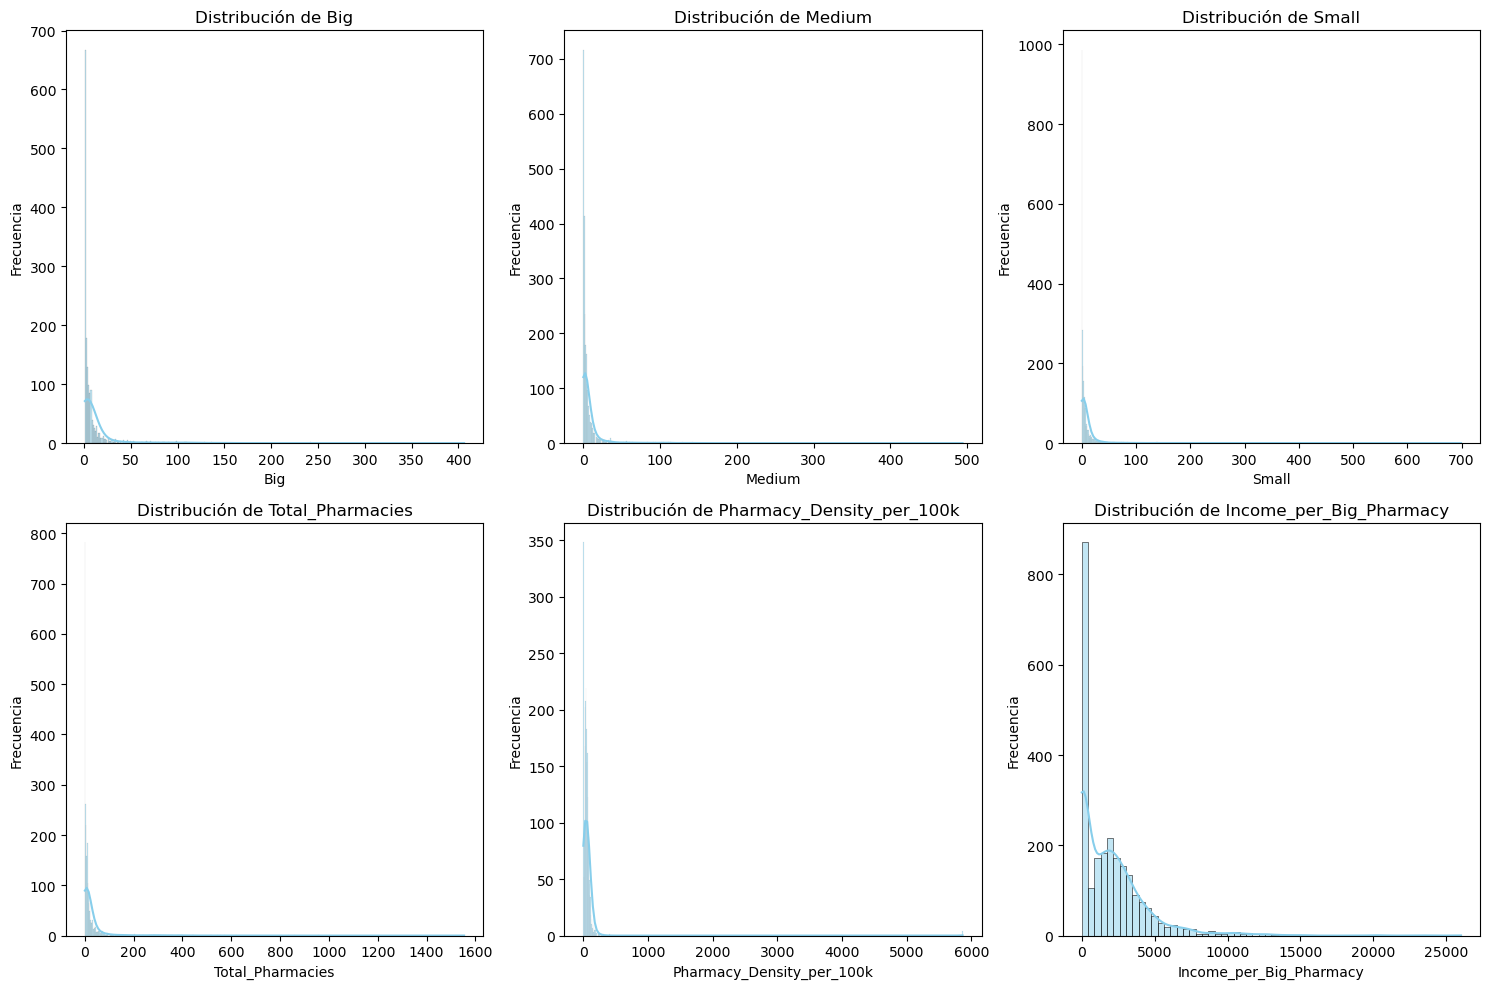

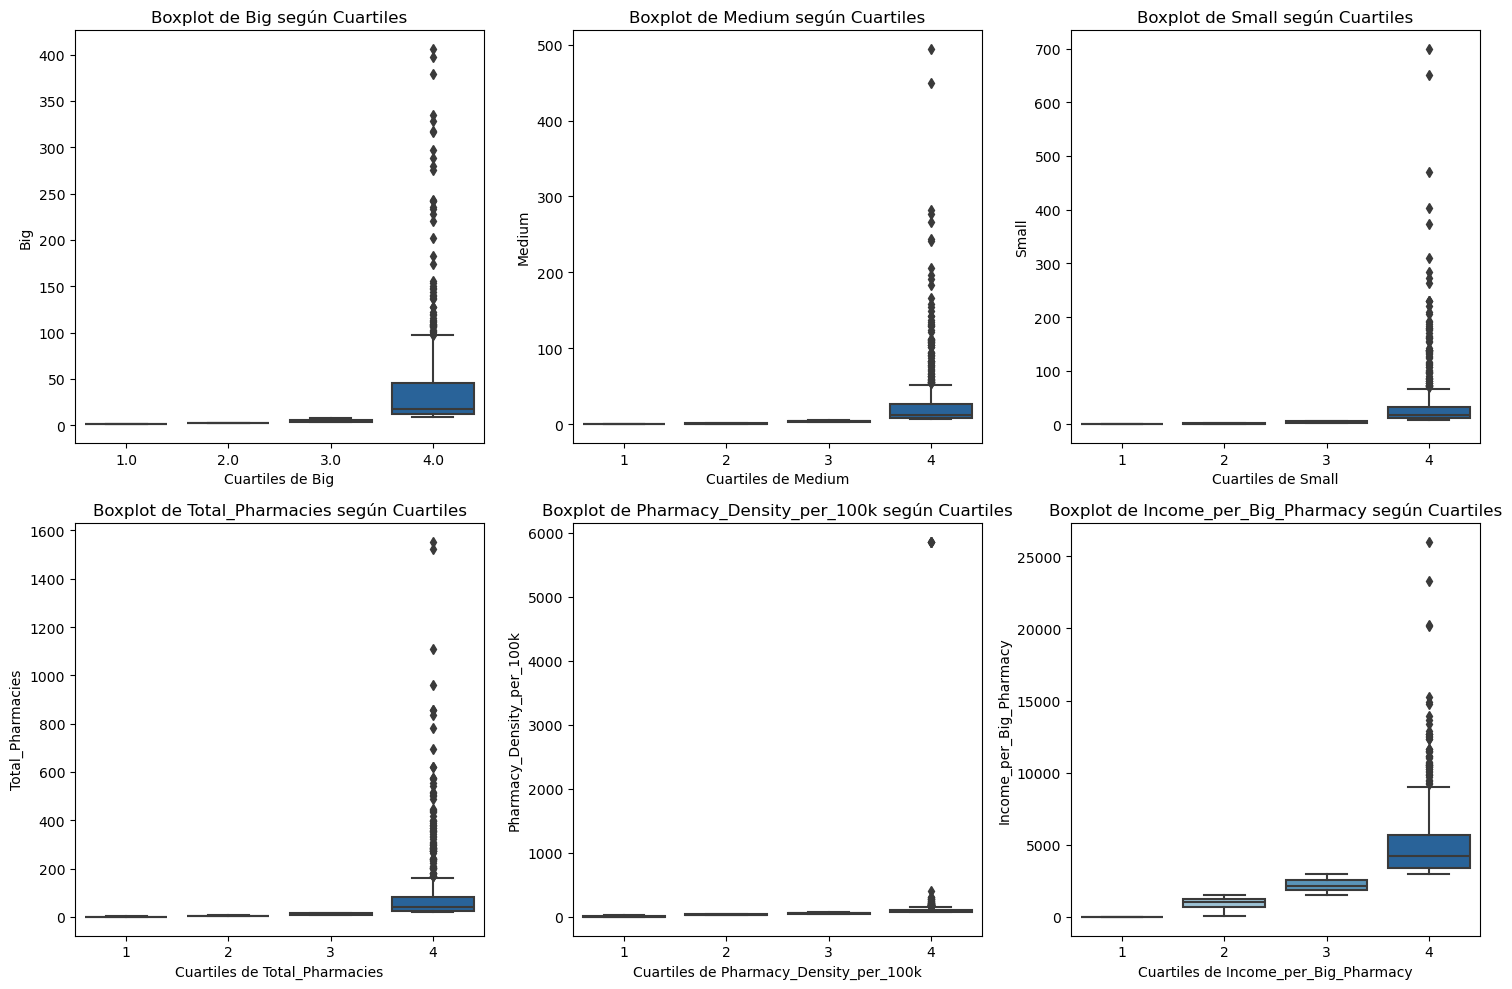

In [40]:
columnas_interes = [
    'Big', 'Medium', 'Small', 'Total_Pharmacies', 
    'Pharmacy_Density_per_100k', 'Income_per_Big_Pharmacy'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_interes):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_filtrado[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_interes):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_filtrado[f'{col}_Quartile'], y=df_filtrado[col], palette='Blues')
    plt.title(f'Boxplot de {col} según Cuartiles')
    plt.xlabel(f'Cuartiles de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [55]:
df_filtrado.iloc[1]

Identificador único del municipio                                                               24050
Clave de entidad federativa                                                                      24.0
Entidad federativa                                                                    SAN LUIS POTOSÍ
Clave de municipio o delegación                                                                  50.0
Municipio o delegación                                                                 Villa de Reyes
Estimador_x                                                                                     Valor
Porcentaje de población de 20 años y más con obesidad.                                      34.217163
Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.            15.389576
Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.                 9.373867
Municipio                                                                         

In [56]:
df_filtrado.groupby('Big_Quartile')['Ingreso Corriente Promedio Trimestral por Hogar 2020'].describe()

,count,mean,std,min,25%,50%,75%,max
Big_Quartile,,,,,,,,
1.0,416.0,32171.341688,8298.131617,14549.656135,25745.093159,30312.887278,38636.494732,54910.061673
2.0,430.0,33626.827859,8967.612725,14857.807778,27597.150659,32662.693431,38864.311362,73960.416432
3.0,403.0,37166.753728,8979.802957,13243.074540,30562.422985,36592.208500,43074.898011,68213.640242
4.0,393.0,46539.155152,13052.570300,12808.542236,37367.642770,45310.859871,53763.368515,115472.296454


# 2.2 Jugando con filtros de Cuartiles

In [57]:
oportunidades_total_farmacias = df_filtrado[(df_filtrado['Income_per_Big_Pharmacy_Quartile'] == 4) & (df_filtrado['Total_Trimestral_Income_Quartile']== 4) & (df_filtrado['Pharmacy_Density_per_100k_Quartile'] == 1)]
oportunidades_total_farmacias

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador_x,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Municipio,...,Income_per_Big_Pharmacy,Total_Diabetes_Pop,Big_Quartile,Medium_Quartile,Small_Quartile,Total_Pharmacies_Quartile,Total_Trimestral_Income_Quartile,Pharmacy_Density_per_100k_Quartile,Income_per_Big_Pharmacy_Quartile,Total_Diabetes_Pop_Quartile
0,15124,15.0,MÉXICO,124.0,San José del Rincón,Valor,30.055295,14.557844,8.101248,SAN JOSÉ DEL RINCÓN,...,26026.497756,8.107891e+05,1.0,3,3,3,4,1,4,4
2,19041,19.0,NUEVO LEÓN,41.0,Pesquería,Valor,44.466632,14.855031,9.091915,PESQUERÍA,...,20249.706605,1.342185e+06,3.0,3,3,3,4,1,4,4
3,19012,19.0,NUEVO LEÓN,12.0,Ciénega de Flores,Valor,45.953218,17.150944,9.885962,CIÉNEGA DE FLORES,...,20179.475201,6.796303e+05,2.0,2,3,3,4,1,4,4
4,13052,13.0,HIDALGO,52.0,San Agustín Tlaxiaca,Valor,33.785847,17.348032,12.050230,SAN AGUSTÍN TLAXIACA,...,15240.981349,4.686455e+05,1.0,3,2,3,4,1,4,4
5,7077,7.0,CHIAPAS,77.0,Salto de Agua,Valor,20.299307,14.436440,6.876684,SALTO DE AGUA,...,14871.166969,4.418338e+05,1.0,3,2,3,4,1,4,4
11,14051,14.0,JALISCO,51.0,Juanacatlán,Valor,38.208258,15.260614,6.639738,JUANACATLÁN,...,12682.324251,2.048691e+05,1.0,2,3,2,4,1,4,3
12,30101,30.0,VERACRUZ DE IGNACIO DE LA LLAVE,101.0,Mariano Escobedo,Valor,32.054187,19.256429,8.296554,MARIANO ESCOBEDO,...,12681.368343,3.208278e+05,1.0,1,2,2,4,1,4,3
16,19045,19.0,NUEVO LEÓN,45.0,Salinas Victoria,Valor,45.416253,19.231347,11.199325,SALINAS VICTORIA,...,12319.468932,9.717207e+05,3.0,2,3,3,4,1,4,4
24,5020,5.0,COAHUILA DE ZARAGOZA,20.0,Múzquiz,Valor,31.787940,21.160642,14.031283,MÚZQUIZ,...,11182.683087,1.005019e+06,2.0,3,3,3,4,1,4,4
27,7099,7.0,CHIAPAS,99.0,La Trinitaria,Valor,28.216694,17.302763,9.110718,LA TRINITARIA,...,10715.074187,7.572009e+05,2.0,4,3,3,4,1,4,4


In [59]:
oportunidades_farmacias_grandes = df_filtrado[(df_filtrado['Income_per_Big_Pharmacy_Quartile'] == 4) & (df_filtrado['Total_Trimestral_Income_Quartile']== 4) & (df_filtrado['Big_Quartile'] == 1)]
oportunidades_farmacias_grandes

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador_x,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Municipio,...,Income_per_Big_Pharmacy,Total_Diabetes_Pop,Big_Quartile,Medium_Quartile,Small_Quartile,Total_Pharmacies_Quartile,Total_Trimestral_Income_Quartile,Pharmacy_Density_per_100k_Quartile,Income_per_Big_Pharmacy_Quartile,Total_Diabetes_Pop_Quartile
0,15124,15.0,MÉXICO,124.0,San José del Rincón,Valor,30.055295,14.557844,8.101248,SAN JOSÉ DEL RINCÓN,...,26026.497756,810789.132000,1.0,3,3,3,4,1,4,4
1,24050,24.0,SAN LUIS POTOSÍ,50.0,Villa de Reyes,Valor,34.217163,15.389576,9.373867,VILLA DE REYES,...,23317.597350,495990.057469,1.0,4,4,4,4,2,4,4
4,13052,13.0,HIDALGO,52.0,San Agustín Tlaxiaca,Valor,33.785847,17.348032,12.050230,SAN AGUSTÍN TLAXIACA,...,15240.981349,468645.503457,1.0,3,2,3,4,1,4,4
5,7077,7.0,CHIAPAS,77.0,Salto de Agua,Valor,20.299307,14.436440,6.876684,SALTO DE AGUA,...,14871.166969,441833.808354,1.0,3,2,3,4,1,4,4
6,30058,30.0,VERACRUZ DE IGNACIO DE LA LLAVE,58.0,Chicontepec,Valor,31.062465,29.416734,12.696948,CHICONTEPEC,...,14729.075087,683832.208913,1.0,4,3,3,4,2,4,4
7,16083,16.0,MICHOACÁN DE OCAMPO,83.0,Tancítaro,Valor,33.871993,15.793627,8.535684,TANCÍTARO,...,13925.683351,285544.234389,1.0,3,3,3,4,2,4,3
8,10039,10.0,DURANGO,39.0,Nuevo Ideal,Valor,40.337645,20.685375,10.244488,NUEVO IDEAL,...,13657.264276,286651.025195,1.0,4,3,3,4,3,4,3
11,14051,14.0,JALISCO,51.0,Juanacatlán,Valor,38.208258,15.260614,6.639738,JUANACATLÁN,...,12682.324251,204869.110880,1.0,2,3,2,4,1,4,3
12,30101,30.0,VERACRUZ DE IGNACIO DE LA LLAVE,101.0,Mariano Escobedo,Valor,32.054187,19.256429,8.296554,MARIANO ESCOBEDO,...,12681.368343,320827.761734,1.0,1,2,2,4,1,4,3
13,30023,30.0,VERACRUZ DE IGNACIO DE LA LLAVE,23.0,Atzalan,Valor,36.841943,20.780628,11.222424,ATZALAN,...,12660.879641,551918.831138,1.0,3,3,3,4,2,4,4


In [60]:
oportunidades_diabetes = df_filtrado[(df_filtrado['Total_Diabetes_Pop_Quartile'] == 4) & (df_filtrado['Total_Trimestral_Income_Quartile']== 4) & (df_filtrado['Pharmacy_Density_per_100k_Quartile'] == 1)]
oportunidades_diabetes

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador_x,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Municipio,...,Income_per_Big_Pharmacy,Total_Diabetes_Pop,Big_Quartile,Medium_Quartile,Small_Quartile,Total_Pharmacies_Quartile,Total_Trimestral_Income_Quartile,Pharmacy_Density_per_100k_Quartile,Income_per_Big_Pharmacy_Quartile,Total_Diabetes_Pop_Quartile
0,15124,15.0,MÉXICO,124.0,San José del Rincón,Valor,30.055295,14.557844,8.101248,SAN JOSÉ DEL RINCÓN,...,26026.497756,8.107891e+05,1.0,3,3,3,4,1,4,4
2,19041,19.0,NUEVO LEÓN,41.0,Pesquería,Valor,44.466632,14.855031,9.091915,PESQUERÍA,...,20249.706605,1.342185e+06,3.0,3,3,3,4,1,4,4
3,19012,19.0,NUEVO LEÓN,12.0,Ciénega de Flores,Valor,45.953218,17.150944,9.885962,CIÉNEGA DE FLORES,...,20179.475201,6.796303e+05,2.0,2,3,3,4,1,4,4
4,13052,13.0,HIDALGO,52.0,San Agustín Tlaxiaca,Valor,33.785847,17.348032,12.050230,SAN AGUSTÍN TLAXIACA,...,15240.981349,4.686455e+05,1.0,3,2,3,4,1,4,4
5,7077,7.0,CHIAPAS,77.0,Salto de Agua,Valor,20.299307,14.436440,6.876684,SALTO DE AGUA,...,14871.166969,4.418338e+05,1.0,3,2,3,4,1,4,4
16,19045,19.0,NUEVO LEÓN,45.0,Salinas Victoria,Valor,45.416253,19.231347,11.199325,SALINAS VICTORIA,...,12319.468932,9.717207e+05,3.0,2,3,3,4,1,4,4
24,5020,5.0,COAHUILA DE ZARAGOZA,20.0,Múzquiz,Valor,31.787940,21.160642,14.031283,MÚZQUIZ,...,11182.683087,1.005019e+06,2.0,3,3,3,4,1,4,4
27,7099,7.0,CHIAPAS,99.0,La Trinitaria,Valor,28.216694,17.302763,9.110718,LA TRINITARIA,...,10715.074187,7.572009e+05,2.0,4,3,3,4,1,4,4
29,1002,1.0,AGUASCALIENTES,2.0,Asientos,Valor,32.282284,15.320425,7.953634,ASIENTOS,...,10570.684882,4.098985e+05,2.0,3,3,3,4,1,4,4
36,10023,10.0,DURANGO,23.0,Pueblo Nuevo,Valor,37.174341,15.693313,8.105745,PUEBLO NUEVO,...,10254.381905,4.155734e+05,2.0,3,3,3,4,1,4,4


In [62]:
oportunidades_diabetes = df_filtrado[(df_filtrado['Total_Diabetes_Pop_Quartile'] == 4) & (df_filtrado['Total_Trimestral_Income_Quartile']== 4) & (df_filtrado['Income_per_Big_Pharmacy_Quartile'] == 4) & (df_filtrado['Pharmacy_Density_per_100k_Quartile'] == 1)]
oportunidades_diabetes

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador_x,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Municipio,...,Income_per_Big_Pharmacy,Total_Diabetes_Pop,Big_Quartile,Medium_Quartile,Small_Quartile,Total_Pharmacies_Quartile,Total_Trimestral_Income_Quartile,Pharmacy_Density_per_100k_Quartile,Income_per_Big_Pharmacy_Quartile,Total_Diabetes_Pop_Quartile
0,15124,15.0,MÉXICO,124.0,San José del Rincón,Valor,30.055295,14.557844,8.101248,SAN JOSÉ DEL RINCÓN,...,26026.497756,8.107891e+05,1.0,3,3,3,4,1,4,4
2,19041,19.0,NUEVO LEÓN,41.0,Pesquería,Valor,44.466632,14.855031,9.091915,PESQUERÍA,...,20249.706605,1.342185e+06,3.0,3,3,3,4,1,4,4
3,19012,19.0,NUEVO LEÓN,12.0,Ciénega de Flores,Valor,45.953218,17.150944,9.885962,CIÉNEGA DE FLORES,...,20179.475201,6.796303e+05,2.0,2,3,3,4,1,4,4
4,13052,13.0,HIDALGO,52.0,San Agustín Tlaxiaca,Valor,33.785847,17.348032,12.050230,SAN AGUSTÍN TLAXIACA,...,15240.981349,4.686455e+05,1.0,3,2,3,4,1,4,4
5,7077,7.0,CHIAPAS,77.0,Salto de Agua,Valor,20.299307,14.436440,6.876684,SALTO DE AGUA,...,14871.166969,4.418338e+05,1.0,3,2,3,4,1,4,4
16,19045,19.0,NUEVO LEÓN,45.0,Salinas Victoria,Valor,45.416253,19.231347,11.199325,SALINAS VICTORIA,...,12319.468932,9.717207e+05,3.0,2,3,3,4,1,4,4
24,5020,5.0,COAHUILA DE ZARAGOZA,20.0,Múzquiz,Valor,31.787940,21.160642,14.031283,MÚZQUIZ,...,11182.683087,1.005019e+06,2.0,3,3,3,4,1,4,4
27,7099,7.0,CHIAPAS,99.0,La Trinitaria,Valor,28.216694,17.302763,9.110718,LA TRINITARIA,...,10715.074187,7.572009e+05,2.0,4,3,3,4,1,4,4
29,1002,1.0,AGUASCALIENTES,2.0,Asientos,Valor,32.282284,15.320425,7.953634,ASIENTOS,...,10570.684882,4.098985e+05,2.0,3,3,3,4,1,4,4
36,10023,10.0,DURANGO,23.0,Pueblo Nuevo,Valor,37.174341,15.693313,8.105745,PUEBLO NUEVO,...,10254.381905,4.155734e+05,2.0,3,3,3,4,1,4,4


In [66]:
comparacion = df_filtrado[['Total_Trimestral_Income_Quartile', 'Income_per_Big_Pharmacy_Quartile']].corr()
comparacion

,Total_Trimestral_Income_Quartile,Income_per_Big_Pharmacy_Quartile
Total_Trimestral_Income_Quartile,1.000000,0.732422
Income_per_Big_Pharmacy_Quartile,0.732422,1.000000


In [69]:
df_filtrado.iloc[2]

Identificador único del municipio                                                               19041
Clave de entidad federativa                                                                      19.0
Entidad federativa                                                                         NUEVO LEÓN
Clave de municipio o delegación                                                                  41.0
Municipio o delegación                                                                      Pesquería
Estimador_x                                                                                     Valor
Porcentaje de población de 20 años y más con obesidad.                                      44.466632
Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.            14.855031
Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.                 9.091915
Municipio                                                                         

# 3. Analisis de AutoGluon para municipios con al menos 1 farmacia grande

In [68]:
df_para_prediccion_masde0 = df_filtrado[df_filtrado['Big'] > 0]

In [77]:
target = 'Big'
features = [
    'Ingreso Corriente Promedio Trimestral por Hogar 2020',
    'Total',
    'Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.',
    'Pharmacy_Density_per_100k',
    'Total_Pharmacies',
    'Total_Trimestral_Income',
    'Total_Diabetes_Pop',
    'Total_Trimestral_Income_Quartile',
    'Total_Diabetes_Pop_Quartile',
    'Pharmacy_Density_per_100k_Quartile'
]

# Definir los datos de entrada para AutoGluon
X = df_para_prediccion_masde0[features]
y = df_para_prediccion_masde0[target]

In [78]:
predictor = TabularPredictor(label=target, problem_type='regression').fit(train_data=df_para_prediccion_masde0[features + [target]])

No path specified. Models will be saved in: "AutogluonModels\ag-20240928_224332"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240928_224332"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:      

In [79]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -5.577765  root_mean_squared_error       0.003987  2.443242                0.000000           0.015627            2       True         12
1              CatBoost  -5.605124  root_mean_squared_error       0.003987  2.060212                0.003987           2.060212            1       True          6
2         ExtraTreesMSE  -6.271070  root_mean_squared_error       0.065454  0.619713                0.065454           0.619713            1       True          7
3       RandomForestMSE  -6.292291  root_mean_squared_error       0.065873  0.680976                0.065873           0.680976            1       True          5
4         LightGBMLarge  -6.529267  root_mean_squared_error       0.015640  1.212327                0.015640           1.21

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -7.916048959398619,
  'KNeighborsDist': -8.283697186264455,
  'LightGBMXT': -6.781386373139245,
  'LightGBM': -7.4634366937488865,
  'RandomForestMSE': -6.292291309269536,
  'CatBoost': -5.6051243770455095,
  'ExtraTreesMSE': -6.271070250905913,
  'NeuralNetFastAI': -6.566879211589276,
  'XGBoost': -8.280704968549184,
  'NeuralNetTorch': -6.701882929699242,
  'LightGBMLarge': -6.529267115085885,
  'WeightedEnsemble_L2': -5.577765318106633},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighb

In [80]:
feature_importance = predictor.feature_importance(df_para_prediccion_masde0)

These features in provided data are not utilized by the predictor and will be ignored: ['Identificador único del municipio', 'Clave de entidad federativa', 'Entidad federativa', 'Clave de municipio o delegación', 'Municipio o delegación', 'Estimador_x', 'Porcentaje de población de 20 años y más con obesidad.', 'Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.', 'Municipio', 'Estimador_y', 'Codigo', 'municipio', 'entidad', 'Medium', 'Small', 'Big_Pharmacy_Ratio', 'Medium_Pharmacy_Ratio', 'Income_per_Big_Pharmacy', 'Big_Quartile', 'Medium_Quartile', 'Small_Quartile', 'Total_Pharmacies_Quartile', 'Income_per_Big_Pharmacy_Quartile']
Computing feature importance via permutation shuffling for 10 features using 1642 rows with 5 shuffle sets...
	0.75s	= Expected runtime (0.15s per shuffle set)
	0.22s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [81]:
feature_importance

,importance,stddev,p_value,n,p99_high,p99_low
Total_Pharmacies,20.011382,0.394899,1.818825e-08,5,20.824485,19.198280
Total_Diabetes_Pop,15.131534,0.432760,8.019783e-08,5,16.022592,14.240476
Total,14.828642,0.384332,5.410199e-08,5,15.619987,14.037297
Total_Trimestral_Income,11.146728,0.421665,2.452637e-07,5,12.014942,10.278514
Ingreso Corriente Promedio Trimestral por Hogar 2020,2.961215,0.292433,1.126624e-05,5,3.563338,2.359092
Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,1.961903,0.425250,2.490698e-04,5,2.837498,1.086307
Pharmacy_Density_per_100k,1.707625,0.349619,1.995725e-04,5,2.427496,0.987754
Total_Diabetes_Pop_Quartile,1.552636,0.329083,2.283223e-04,5,2.230222,0.875050
Total_Trimestral_Income_Quartile,1.153519,0.225073,1.654412e-04,5,1.616947,0.690091
Pharmacy_Density_per_100k_Quartile,0.959733,0.190483,1.768191e-04,5,1.351940,0.567526


In [87]:
df_para_prediccion_masde0.loc[:, 'Big_Pred'] = predictor.predict(df_para_prediccion_masde0)

In [154]:
df_para_prediccion_masde0.loc[:, 'Difference'] = df_para_prediccion_masde0['Big_Pred'] - df_para_prediccion_masde0['Big']

In [155]:
df_para_prediccion_masde0.loc[:, 'Difference Ratio'] = df_para_prediccion_masde0['Big_Pred'] / df_para_prediccion_masde0['Big']

In [156]:
sub_suministrados = df_para_prediccion_masde0[df_para_prediccion_masde0['Difference'] > 0]
sobre_suministrados = df_para_prediccion_masde0[df_para_prediccion_masde0['Difference'] < 0]

In [171]:
#Basados en sus caracteristicas, se predijeron mas de los que hay; menos de los que deberia haber?
#Los municipios son, en general, municipios urbanizados, de alto ingreso pero no tradicionalmente percibidas como tal, por ser zonas industriales o 'en surgimiento'; coloquialmente, 'clase-medieras' o 'dinero nuevo': Algunas Delegaciones la Ciudad de Mexico (Alvaro Obregon, Coyoacan), La Comarca Lagunera, Matamoros, San Nicolas de los Garza en Nuevo Leon, Queretaro, Chihuahua, Durango, Tamaulipas

print("Municipios sub-suministrados:")
sub_suministrados[['Municipio o delegación', 'Entidad federativa', 'Big', 'Big_Pred', 'Difference']].sort_values(by=['Difference'], ascending=False).head(40)

Municipios sub-suministrados:


,Municipio o delegación,Entidad federativa,Big,Big_Pred,Difference
219,Matamoros,TAMAULIPAS,58.0,105.693649,47.693649
501,Morelia,MICHOACÁN DE OCAMPO,156.0,180.229553,24.229553
18,Lerdo,DURANGO,7.0,26.119354,19.119354
549,Jiutepec,MORELOS,32.0,49.232094,17.232094
440,Victoria,TAMAULIPAS,50.0,65.539230,15.539230
293,Álvaro Obregón,CIUDAD DE MÉXICO,113.0,125.984756,12.984756
424,Xochimilco,CIUDAD DE MÉXICO,72.0,84.927528,12.927528
67,Gómez Palacio,DURANGO,26.0,38.882332,12.882332
356,Durango,DURANGO,102.0,114.813385,12.813385
341,Coyoacán,CIUDAD DE MÉXICO,114.0,126.605545,12.605545


In [170]:
sub_suministrados[['Municipio o delegación', 'Entidad federativa', 'Big', 'Big_Pred', 'Difference Ratio']].sort_values(by=['Difference Ratio'], ascending=False).head(20)

,Municipio o delegación,Entidad federativa,Big,Big_Pred,Difference Ratio
1,Villa de Reyes,SAN LUIS POTOSÍ,1.0,6.515431,6.515431
19,Atotonilco el Grande,HIDALGO,1.0,6.078632,6.078632
6,Chicontepec,VERACRUZ DE IGNACIO DE LA LLAVE,1.0,4.963178,4.963178
13,Atzalan,VERACRUZ DE IGNACIO DE LA LLAVE,1.0,4.445124,4.445124
8,Nuevo Ideal,DURANGO,1.0,4.432872,4.432872
28,Jalpan de Serra,QUERÉTARO,1.0,4.322971,4.322971
158,Rafael Lara Grajales,PUEBLA,1.0,4.225548,4.225548
15,Jalacingo,VERACRUZ DE IGNACIO DE LA LLAVE,1.0,4.192743,4.192743
22,San Antonio de la Cal,OAXACA,1.0,4.188684,4.188684
4,San Agustín Tlaxiaca,HIDALGO,1.0,4.095200,4.095200


In [168]:
sub_suministrados_filtrado = sub_suministrados[
    (sub_suministrados['Big'] > 3) & (sub_suministrados['Difference Ratio'] > 2)
]

sub_suministrados_filtrado[['Municipio o delegación', 'Entidad federativa', 'Big', 'Big_Pred', 'Difference Ratio']].sort_values(by=['Difference Ratio'], ascending=False)

,Municipio o delegación,Entidad federativa,Big,Big_Pred,Difference Ratio
18,Lerdo,DURANGO,7.0,26.119354,3.731336
10,Zihuatanejo de Azueta,GUERRERO,4.0,13.568892,3.392223
113,Francisco I. Madero,COAHUILA DE ZARAGOZA,4.0,10.602647,2.650662
128,Actopan,HIDALGO,4.0,10.389126,2.597281
58,Tepeji del Río de Ocampo,HIDALGO,5.0,12.734123,2.546825
80,Sinaloa,SINALOA,4.0,9.060773,2.265193
538,Heroica Ciudad de Tlaxiaco,OAXACA,5.0,11.102650,2.220530
61,Chilapa de Álvarez,GUERRERO,5.0,10.852600,2.170520


In [187]:
#Basado en sus caracteristicas, se predigeron menos de los que hay; mucha competencia?
#Curioso notar que muchos de estos son municipios turisticos: Boca del Rio, Guadalajara, Cancun, Merida, Tapachula, Tijuana, Cozumel, Tulum, Valladolid, Mazatlan, Orizaba
#Excepciones a esto son municipios densos del Altiplano central, como Iztapalapa, Ecatepec e Ixtapaluca

print("Municipios sobre-suministrados:")
sobre_suministrados[['Municipio o delegación', 'Entidad federativa', 'Big', 'Big_Pred', 'Difference']].sort_values(by=['Difference']).head(50)

Municipios sobre-suministrados:


,Municipio o delegación,Entidad federativa,Big,Big_Pred,Difference
1239,Veracruz,VERACRUZ DE IGNACIO DE LA LLAVE,174.0,121.818237,-52.181763
1287,Boca del Río,VERACRUZ DE IGNACIO DE LA LLAVE,56.0,26.357292,-29.642708
738,Iztapalapa,CIUDAD DE MÉXICO,406.0,379.081299,-26.918701
827,Guadalajara,JALISCO,398.0,372.544434,-25.455566
1075,Mérida,YUCATÁN,335.0,314.759918,-20.240082
853,Ecatepec de Morelos,MÉXICO,379.0,359.212372,-19.787628
1042,Tapachula,CHIAPAS,67.0,48.894321,-18.105679
1182,Benito Juárez,QUINTANA ROO,280.0,262.306488,-17.693512
1305,Othón P. Blanco,QUINTANA ROO,85.0,67.326614,-17.673386
1261,Solidaridad,QUINTANA ROO,109.0,92.493462,-16.506538


# 4. Analisis de Lugares con 0 Farmacias

In [130]:
df_filtrado['Big'] = df_filtrado['Big'].fillna(0)

In [132]:
df_no_big = df_filtrado[df_filtrado['Big'] == 0]

In [136]:
descripcion_no_big = df_no_big[['Total_Pharmacies', 'Total_Diabetes_Pop', 'Total', 'Ingreso Corriente Promedio Trimestral por Hogar 2020', 'Total_Trimestral_Income', 'Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.']].describe()
descripcion_no_big

,Total_Pharmacies,Total_Diabetes_Pop,Total,Ingreso Corriente Promedio Trimestral por Hogar 2020,Total_Trimestral_Income,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.
count,818.000000,818.000000,818.000000,818.000000,8.180000e+02,818.000000
mean,1.652812,56851.606038,5645.830073,30063.921028,1.676282e+08,10.245586
std,2.358193,67387.742203,6427.170944,7804.732322,1.977379e+08,2.265930
min,0.000000,941.425075,81.000000,15545.605334,2.958898e+06,4.916777
25%,0.000000,16148.100298,1533.750000,24382.400951,4.689349e+07,8.632557
50%,1.000000,33441.671728,3450.500000,28421.019959,9.949252e+07,9.949701
75%,2.000000,69186.571906,7079.000000,34040.987112,2.142035e+08,11.452407
max,16.000000,539291.037633,58469.000000,65843.072841,2.135589e+09,25.162845


In [139]:
#Consideramos los factores mas importantes de la prediccion anterior
df_no_big_sorted = df_no_big.sort_values(by=['Total_Pharmacies', 'Total_Diabetes_Pop', 'Total', 'Ingreso Corriente Promedio Trimestral por Hogar 2020', 'Total_Trimestral_Income', 'Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.'])
df_no_big_sorted

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador_x,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Municipio,...,Income_per_Big_Pharmacy,Total_Diabetes_Pop,Big_Quartile,Medium_Quartile,Small_Quartile,Total_Pharmacies_Quartile,Total_Trimestral_Income_Quartile,Pharmacy_Density_per_100k_Quartile,Income_per_Big_Pharmacy_Quartile,Total_Diabetes_Pop_Quartile
1843,20047,20.0,OAXACA,47.0,Santa Magdalena Jicotlán,Valor,17.053818,25.103326,11.622532,SANTA MAGDALENA JICOTLÁN,...,0.0,941.425075,NaN,1,1,1,1,1,1,1
2153,20518,20.0,OAXACA,518.0,Santo Domingo Tlatayápam,Valor,24.672824,28.687542,11.647890,SANTO DOMINGO TLATAYÁPAM,...,0.0,1316.211542,NaN,1,1,1,1,1,1,1
2215,20488,20.0,OAXACA,488.0,Santiago Tepetlapa,Valor,31.402093,25.174334,13.464554,SANTIAGO TEPETLAPA,...,0.0,1750.392005,NaN,1,1,1,1,1,1,1
2436,20341,20.0,OAXACA,341.0,San Pedro Yucunama,Valor,25.764529,24.537534,9.569435,SAN PEDRO YUCUNAMA,...,0.0,2306.233829,NaN,1,1,1,1,1,1,1
2373,20256,20.0,OAXACA,256.0,San Mateo Tlapiltepec,Valor,22.057494,23.138945,10.413548,SAN MATEO TLAPILTEPEC,...,0.0,2384.702462,NaN,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,16063,16.0,MICHOACÁN DE OCAMPO,63.0,Panindícuaro,Valor,26.548566,21.870853,11.927579,PANINDÍCUARO,...,0.0,177589.724102,NaN,3,4,3,3,4,1,3
1989,17013,17.0,MORELOS,13.0,Jonacatepec de Leandro Valle,Valor,31.953800,17.628966,13.187180,JONACATEPEC DE LEANDRO VALLE,...,0.0,220146.789076,NaN,3,3,3,3,4,1,3
2054,7092,7.0,CHIAPAS,92.0,Tecpatán,Valor,26.660660,16.421013,7.730142,TECPATÁN,...,0.0,165626.021158,NaN,3,4,3,3,3,1,3
2127,12048,12.0,GUERRERO,48.0,Petatlán,Valor,38.619355,17.381979,10.393192,PETATLÁN,...,0.0,463359.667243,NaN,4,3,3,4,2,1,4


In [142]:
#Consideraremos las siguientes features
features_important = [
    'Total_Pharmacies',
    'Total_Diabetes_Pop',
    'Total',
    'Total_Trimestral_Income',
    'Ingreso Corriente Promedio Trimestral por Hogar 2020',
    'Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.',
    'Pharmacy_Density_per_100k', 'Total_Trimestral_Income_Quartile', 'Total_Diabetes_Pop_Quartile', 'Pharmacy_Density_per_100k_Quartile' 
    #Las ultimas 4 no son tan relevantes pero es necesario incluirlas para poder reusar el modelo anterior
]
#Recordemos el predictor que ya usamos anteriormente para los municipios que ya tienen al menos una farmacia
#predictor = TabularPredictor(label='Big', problem_type='regression').fit(train_data=df_filtered[features_important + ['Big']])

#Lo aplicaremos al dataset de lugares sin farmacias grandes
df_no_big.loc[:, 'Big_Predicted'] = predictor.predict(df_no_big[features_important])

In [143]:
#Veamos ahora que resultados nos da
df_no_big_sorted_pred = df_no_big.sort_values(by='Big_Predicted', ascending=False)

In [150]:
df_no_big_sorted_pred[['Municipio o delegación', 'Entidad federativa', 'Big_Predicted', 'Total_Pharmacies', 'Total', 'Ingreso Corriente Promedio Trimestral por Hogar 2020', 'Total_Trimestral_Income_Quartile', 'Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.', 'Total_Diabetes_Pop_Quartile']].head(10)

,Municipio o delegación,Entidad federativa,Big_Predicted,Total_Pharmacies,Total,Ingreso Corriente Promedio Trimestral por Hogar 2020,Total_Trimestral_Income_Quartile,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Total_Diabetes_Pop_Quartile
2127,Petatlán,GUERRERO,5.335061,15.0,44583,33204.371471,4,10.393192,4
1667,Mexquitic de Carmona,SAN LUIS POTOSÍ,4.188403,8.0,58469,36525.147319,4,9.223538,4
2094,Panindícuaro,MICHOACÁN DE OCAMPO,3.544908,13.0,14889,38764.088929,3,11.927579,3
2054,Tecpatán,CHIAPAS,3.491200,14.0,21426,27611.864903,3,7.730142,3
1989,Jonacatepec de Leandro Valle,MORELOS,3.372544,13.0,16694,32950.125119,3,13.187180,3
2017,Canatlán,DURANGO,3.338231,10.0,31454,30204.225424,3,10.923545,3
1994,Madera,CHIHUAHUA,3.308882,11.0,25144,40439.148233,3,10.409442,3
2092,San Lucas,MICHOACÁN DE OCAMPO,3.292907,11.0,17677,33140.981796,3,10.918074,3
1649,Tamasopo,SAN LUIS POTOSÍ,3.131998,9.0,29184,38551.838355,3,11.067281,3
1730,Ixcatepec,VERACRUZ DE IGNACIO DE LA LLAVE,3.011162,10.0,12379,25104.304272,2,11.791134,3


# 5. Putting it all together

* Del analisis por cuartiles, podemos obtener los siguientes municipios:
    - Municipios con alto ingreso total, pero pocas farmacias grandes o poca densidad de farmacias
    - Municipios con alta prevalencia de diabetes, altos ingresos y baja densidad de farmacias

In [177]:
#Municipios con alto ingreso total, pero pocas farmacias grandes o baja densidad de farmacias
grupo_1 = df_filtrado[
    (df_filtrado['Total_Trimestral_Income_Quartile'] == 4) & 
    ((df_filtrado['Big_Quartile'] == 1) | (df_filtrado['Pharmacy_Density_per_100k_Quartile'] == 1))
]

#Municipios con alta prevalencia de diabetes, altos ingresos y baja densidad de farmacias
grupo_2 = df_filtrado[
    (df_filtrado['Total_Diabetes_Pop_Quartile'] == 4) &
    (df_filtrado['Total_Trimestral_Income_Quartile'] == 4) &
    (df_filtrado['Pharmacy_Density_per_100k_Quartile'] == 1)
]

df_combinado = pd.concat([grupo_1, grupo_2]).drop_duplicates()
df_combinado[['Municipio o delegación', 'Entidad federativa', 'Big', 'Total', 'Total_Trimestral_Income_Quartile', 'Big_Quartile', 'Pharmacy_Density_per_100k_Quartile', 'Total_Diabetes_Pop_Quartile']]

,Municipio o delegación,Entidad federativa,Big,Total,Total_Trimestral_Income_Quartile,Big_Quartile,Pharmacy_Density_per_100k_Quartile,Total_Diabetes_Pop_Quartile
0,San José del Rincón,MÉXICO,1.0,100082,4,1.0,1,4
1,Villa de Reyes,SAN LUIS POTOSÍ,1.0,52912,4,1.0,2,4
2,Pesquería,NUEVO LEÓN,4.0,147624,4,3.0,1,4
3,Ciénega de Flores,NUEVO LEÓN,2.0,68747,4,2.0,1,4
4,San Agustín Tlaxiaca,HIDALGO,1.0,38891,4,1.0,1,4
...,...,...,...,...,...,...,...,...
702,Felipe Carrillo Puerto,QUINTANA ROO,10.0,83990,4,4.0,1,4
753,Manuel Doblado,GUANAJUATO,6.0,41240,4,3.0,1,4
779,Tekax,YUCATÁN,6.0,45062,4,3.0,1,4
1667,Mexquitic de Carmona,SAN LUIS POTOSÍ,0.0,58469,4,NaN,1,4


* Del analisis de regresion para municipios con al menos 1 farmacia grande, tomaremos los municipios que:
    - Tengan una difference de mas de 7 OR
    - Tengan un difference ratio mayor de 4 AND tengan solo una farmacia
    - Tengan un difference ratio mayor de 3 AND tengan 2 o 3 farmacias
    - Tengan un difference ratio mayor a 2 AND tengan mas de 3 farmacias

In [181]:
sub_suministrados_filtrado = sub_suministrados[
    (sub_suministrados['Difference'] > 7) |
    ((sub_suministrados['Difference Ratio'] > 4) & (sub_suministrados['Big'] == 1)) |
    ((sub_suministrados['Difference Ratio'] > 3) & (sub_suministrados['Big'].isin([2, 3]))) |
    ((sub_suministrados['Difference Ratio'] > 2) & (sub_suministrados['Big'] > 3))
]
sub_suministrados_filtrado[['Municipio o delegación', 'Entidad federativa', 'Difference', 'Total']].sort_values(by='Difference', ascending=False)

,Municipio o delegación,Entidad federativa,Difference,Total
219,Matamoros,TAMAULIPAS,47.693649,541979
501,Morelia,MICHOACÁN DE OCAMPO,24.229553,849053
18,Lerdo,DURANGO,19.119354,163313
549,Jiutepec,MORELOS,17.232094,215357
440,Victoria,TAMAULIPAS,15.539230,349688
293,Álvaro Obregón,CIUDAD DE MÉXICO,12.984756,759137
424,Xochimilco,CIUDAD DE MÉXICO,12.927528,442178
67,Gómez Palacio,DURANGO,12.882332,372750
356,Durango,DURANGO,12.813385,688697
341,Coyoacán,CIUDAD DE MÉXICO,12.605545,614447


Para los municipios mas 'sobre-suministrados', seleccionaremos los municipios turisticos; es decir, aquellos con una poblacion flotante significativa

In [197]:
municipios_turisticos = [
    ('Veracruz', 'VERACRUZ DE IGNACIO DE LA LLAVE'),
    ('Boca del Río', 'VERACRUZ DE IGNACIO DE LA LLAVE'),
    ('Guadalajara', 'JALISCO'),
    ('Mérida', 'YUCATÁN'),
    ('Tapachula', 'CHIAPAS'),
    ('Benito Juárez', 'QUINTANA ROO'),
    ('Othón P. Blanco', 'QUINTANA ROO'),
    ('Solidaridad', 'QUINTANA ROO'),
    ('Culiacán', 'SINALOA'),
    ('León', 'GUANAJUATO'),
    ('Tijuana', 'BAJA CALIFORNIA'),
    ('Campeche', 'CAMPECHE'),
    ('Salamanca', 'GUANAJUATO'),
    ('Cozumel', 'QUINTANA ROO'),
    ('Valladolid', 'YUCATÁN'),
    ('Orizaba', 'VERACRUZ DE IGNACIO DE LA LLAVE'),
    ('José María Morelos', 'QUINTANA ROO'),
    ('Córdoba', 'VERACRUZ DE IGNACIO DE LA LLAVE'),
    ('Tulum', 'QUINTANA ROO'),
    ('Mazatlán', 'SINALOA'),
    ('Minatitlán', 'VERACRUZ DE IGNACIO DE LA LLAVE'),
    ('Cajeme', 'SONORA'),
    ('Guanajuato', 'GUANAJUATO'),
    ('Tizimín', 'YUCATÁN'),
    ('Hermosillo', 'SONORA'),
    ('Acayucan', 'VERACRUZ DE IGNACIO DE LA LLAVE'),
    ('Moroleón', 'GUANAJUATO'),
    ('Champotón', 'CAMPECHE'),
    ('Coatzacoalcos', 'VERACRUZ DE IGNACIO DE LA LLAVE')
]

df_turistico_sobresuministrado = df_filtrado[df_filtrado.apply(lambda x: (x['Municipio o delegación'], x['Entidad federativa']) in municipios_turisticos, axis=1)]

Esto es porque hay muchos estados y municipios que estan sobrerrepresentados, y no esta alineado su nivel de poblacion e ingreso; si bien ciertos municipios de Veracruz, Quintana Roo o Sinaloa pueden explicarse por su actividad turistica, las farmacias en general estan concentradas en estados de bajo crecimiento poblacional y economico (Veracruz, Puebla, Michoacan, Oaxaca), y no dan abasto a los estados en crecimiento (Queretaro, Baja California, Nuevo Leon, Durango)

In [196]:
farmacias_por_entidad = df_filtrado.groupby('Entidad federativa')['Big'].sum()
ingreso_por_entidad = df_filtrado.groupby('Entidad federativa')['Total_Trimestral_Income'].sum()
proporcion_farmacias = farmacias_por_entidad / farmacias_por_entidad.sum()
proporcion_ingreso = ingreso_por_entidad / ingreso_por_entidad.sum()

representacion = pd.DataFrame({
    'Proporción Farmacias': proporcion_farmacias,
    'Proporción Poblacion Ingreso': proporcion_ingreso
})

representacion['Diferencia'] = representacion['Proporción Farmacias'] - representacion['Proporción Poblacion Ingreso']

representacion = representacion.sort_values(by='Diferencia', ascending=False)

In [192]:
representacion

,Proporción Farmacias,Proporción Ingreso,Diferencia
Entidad federativa,,,
MÉXICO,0.154852,0.130247,0.024605
VERACRUZ DE IGNACIO DE LA LLAVE,0.063678,0.043653,0.020026
QUINTANA ROO,0.026294,0.013188,0.013106
CHIAPAS,0.034427,0.024151,0.010276
SINALOA,0.035397,0.026321,0.009076
YUCATÁN,0.025508,0.016580,0.008929
MICHOACÁN DE OCAMPO,0.041405,0.034209,0.007196
PUEBLA,0.045610,0.040032,0.005578
GUANAJUATO,0.051710,0.046586,0.005123


* Del analisis de regresion para municipios sin farmacias grandes, tomaremos los municipios que tienen una proyeccion de tener al menos 3 farmacias grandes.

In [178]:
df_municipios_pred_3 = df_no_big_sorted_pred[df_no_big_sorted_pred['Big_Predicted'] > 3]

In [184]:
df_municipios_pred_3[['Municipio o delegación', 'Entidad federativa', 'Big_Predicted', 'Total', 'Ingreso Corriente Promedio Trimestral por Hogar 2020']].sort_values(by='Big_Predicted', ascending=False)

,Municipio o delegación,Entidad federativa,Big_Predicted,Total,Ingreso Corriente Promedio Trimestral por Hogar 2020
2127,Petatlán,GUERRERO,5.335061,44583,33204.371471
1667,Mexquitic de Carmona,SAN LUIS POTOSÍ,4.188403,58469,36525.147319
2094,Panindícuaro,MICHOACÁN DE OCAMPO,3.544908,14889,38764.088929
2054,Tecpatán,CHIAPAS,3.491200,21426,27611.864903
1989,Jonacatepec de Leandro Valle,MORELOS,3.372544,16694,32950.125119
2017,Canatlán,DURANGO,3.338231,31454,30204.225424
1994,Madera,CHIHUAHUA,3.308882,25144,40439.148233
2092,San Lucas,MICHOACÁN DE OCAMPO,3.292907,17677,33140.981796
1649,Tamasopo,SAN LUIS POTOSÍ,3.131998,29184,38551.838355
1730,Ixcatepec,VERACRUZ DE IGNACIO DE LA LLAVE,3.011162,12379,25104.304272


# ASIGNACIONES DE FARMACIAS

#### 1 sola farmacia para los municipios sin farmacias grandes, los cuales deberian de tener al menos 3 farmacias grandes basado en sus caracteristicas

In [199]:
df_municipios_pred_3.loc[:, 'Farmacias_Asignadas'] = (df_municipios_pred_3['Big_Predicted'] // 3).astype(int)
print(df_municipios_pred_3[['Municipio o delegación', 'Big_Predicted', 'Farmacias_Asignadas']].head())

            Municipio o delegación  Big_Predicted  Farmacias_Asignadas
2127                      Petatlán       5.335061                    1
1667          Mexquitic de Carmona       4.188403                    1
2094                  Panindícuaro       3.544908                    1
2054                      Tecpatán       3.491200                    1
1989  Jonacatepec de Leandro Valle       3.372544                    1


#### Para los municipios sub-suministrados, podemos asignar 1 farmacia por cada diferencia de 3 farmacias predecidas

In [201]:
sub_suministrados_filtrado.loc[:,'Farmacias_Asignadas'] = (sub_suministrados_filtrado['Difference'] // 3).astype(int)
print(sub_suministrados_filtrado[['Municipio o delegación', 'Difference', 'Farmacias_Asignadas']].head())

   Municipio o delegación  Difference  Farmacias_Asignadas
1          Villa de Reyes    5.515431                    1
4    San Agustín Tlaxiaca    3.095200                    1
6             Chicontepec    3.963178                    1
8             Nuevo Ideal    3.432872                    1
10  Zihuatanejo de Azueta    9.568892                    3


In [202]:
df_combinado_pred_suministrados = pd.concat([df_municipios_pred_3, sub_suministrados_filtrado], ignore_index=True)
print(df_combinado_pred_suministrados[['Municipio o delegación', 'Farmacias_Asignadas']].head())

         Municipio o delegación  Farmacias_Asignadas
0                      Petatlán                    1
1          Mexquitic de Carmona                    1
2                  Panindícuaro                    1
3                      Tecpatán                    1
4  Jonacatepec de Leandro Valle                    1


In [204]:
sum(df_combinado_pred_suministrados['Farmacias_Asignadas'])

156

#### Excluimos a los municipios que ya tienen una asignacion de farmacia del analisis por cuartiles

In [206]:
df_merge = df_combinado.merge(
    df_combinado_pred_suministrados[['Municipio o delegación', 'Entidad federativa']],
    on=['Municipio o delegación', 'Entidad federativa'],
    how='left',
    indicator=True
)

df_combinado_sin_overlap = df_merge[df_merge['_merge'] == 'left_only'].drop(columns=['_merge'])

In [207]:
df_combinado_sin_overlap[['Municipio o delegación', 'Entidad federativa']]

,Municipio o delegación,Entidad federativa
0,San José del Rincón,MÉXICO
2,Pesquería,NUEVO LEÓN
3,Ciénega de Flores,NUEVO LEÓN
5,Salto de Agua,CHIAPAS
7,Tancítaro,MICHOACÁN DE OCAMPO
...,...,...
64,Cunduacán,TABASCO
65,Felipe Carrillo Puerto,QUINTANA ROO
66,Manuel Doblado,GUANAJUATO
67,Tekax,YUCATÁN


Y dependiendo de su ingreso, incidencia de diabetes y densidad de farmacias, podemos asignar 1 o 2 farmacias grandes

In [230]:
def asignar_farmacias_por_cuartil(row):
    if row['Pharmacy_Density_per_100k_Quartile'] == 1 and row['Total_Trimestral_Income_Quartile'] == 4 and (row['Total_Diabetes_Pop_Quartile'] == 4 or row['Total_Diabetes_Pop_Quartile'] == 3):
        return 1
    else:
        return 0
    
df_combinado_sin_overlap['Farmacias_Asignadas'] = df_combinado_sin_overlap.apply(asignar_farmacias_por_cuartil, axis=1)

In [231]:
df_combinado_sin_overlap[['Municipio o delegación', 'Farmacias_Asignadas']]

,Municipio o delegación,Farmacias_Asignadas
0,San José del Rincón,1
2,Pesquería,1
3,Ciénega de Flores,1
5,Salto de Agua,1
7,Tancítaro,0
...,...,...
64,Cunduacán,1
65,Felipe Carrillo Puerto,1
66,Manuel Doblado,1
67,Tekax,1


In [232]:
df_final_combinado = pd.concat([df_combinado_pred_suministrados, df_combinado_sin_overlap], ignore_index=True)

In [233]:
sum(df_final_combinado['Farmacias_Asignadas'])

217

In [238]:
df_final_combinado.sort_values(by=['Farmacias_Asignadas'], ascending=False)

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador_x,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.,Municipio,...,Total_Pharmacies_Quartile,Total_Trimestral_Income_Quartile,Pharmacy_Density_per_100k_Quartile,Income_per_Big_Pharmacy_Quartile,Total_Diabetes_Pop_Quartile,Big_Predicted,Farmacias_Asignadas,Big_Pred,Difference,Difference Ratio
37,28022,28.0,TAMAULIPAS,22.0,Matamoros,Valor,44.820296,19.944116,13.830833,MATAMOROS,...,4,4,2,4,4,NaN,15,105.693649,47.693649,1.822304
56,16053,16.0,MICHOACÁN DE OCAMPO,53.0,Morelia,Valor,29.588929,20.219295,8.474368,MORELIA,...,4,4,4,4,4,NaN,8,180.229553,24.229553,1.155318
17,10012,10.0,DURANGO,12.0,Lerdo,Valor,46.491310,22.045883,11.544190,LERDO,...,4,4,2,4,4,NaN,6,26.119354,19.119354,3.731336
54,28041,28.0,TAMAULIPAS,41.0,Victoria,Valor,46.164019,18.905212,13.019757,VICTORIA,...,4,4,2,4,4,NaN,5,65.539230,15.539230,1.310785
61,17011,17.0,MORELOS,11.0,Jiutepec,Valor,30.778625,19.452749,9.870281,JIUTEPEC,...,4,4,3,4,4,NaN,5,49.232094,17.232094,1.538503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,24021,24.0,SAN LUIS POTOSÍ,21.0,Mexquitic de Carmona,Valor,26.013798,18.223493,9.223538,MEXQUITIC DE CARMONA,...,3,4,1,1,4,4.188403,1,NaN,NaN,NaN
34,21117,21.0,PUEBLA,117.0,Rafael Lara Grajales,Valor,36.633983,14.612148,10.445800,RAFAEL LARA GRAJALES,...,4,3,4,4,3,NaN,1,4.225548,3.225548,4.225548
127,5006,5.0,COAHUILA DE ZARAGOZA,6.0,Castaños,Valor,66.974325,20.439229,13.896759,CASTAÑOS,...,2,4,1,1,4,NaN,1,NaN,NaN,NaN
72,14064,14.0,JALISCO,64.0,Ojuelos de Jalisco,Valor,30.300485,15.822841,6.838682,OJUELOS DE JALISCO,...,3,4,2,4,3,NaN,0,NaN,NaN,NaN


### Calculemos las nuevas ubicaciones con DBScan

DBScan es mas apropiado por que las ubicaciones no son uniformes, e identifica los clusters basado en las densidades existenses, en lugar de ocupar que predefinamos el numero de clusters. 

In [261]:
df_farmacias_filtradas = df_farmacias[
    (df_farmacias['municipio'].isin(df_final_combinado['Municipio'])) & 
    (df_farmacias['entidad'].isin(df_final_combinado['Entidad federativa']))
]

In [282]:
nuevas_ubicaciones = []

for index, row in df_final_combinado.iterrows():
    municipio = row['Municipio']
    entidad = row['Entidad federativa']
    farmacias_asignar = row['Farmacias_Asignadas']
    
    farmacias_municipio = df_farmacias[
        (df_farmacias['municipio'] == municipio) & 
        (df_farmacias['entidad'] == entidad)
    ].copy()

    if not farmacias_municipio.empty:
        coords_municipio = farmacias_municipio[['latitud', 'longitud']].dropna()
        
        dbscan = DBSCAN(eps=0.01, min_samples=5)
        clusters = dbscan.fit_predict(coords_municipio)
        
        farmacias_municipio['Cluster'] = clusters

        for i in range(farmacias_asignar):
            nuevas_ubicaciones.append({
                'Municipio o delegación': municipio,
                'Entidad federativa': entidad,
                'Latitud': coords_municipio.iloc[i]['latitud'],
                'Longitud': coords_municipio.iloc[i]['longitud']
            })

         Municipio o delegación   Entidad federativa    Latitud    Longitud
0                      PETATLÁN             GUERRERO  17.568096 -101.346505
1          MEXQUITIC DE CARMONA      SAN LUIS POTOSÍ  22.266637 -101.114147
2                  PANINDÍCUARO  MICHOACÁN DE OCAMPO  19.982097 -101.761031
3                      TECPATÁN              CHIAPAS  17.137195  -93.310369
4  JONACATEPEC DE LEANDRO VALLE              MORELOS  18.681061  -98.802582


In [284]:
df_nuevas_ubicaciones = pd.DataFrame(nuevas_ubicaciones)

In [285]:
df_nuevas_ubicaciones

,Municipio o delegación,Entidad federativa,Latitud,Longitud
0,PETATLÁN,GUERRERO,17.568096,-101.346505
1,MEXQUITIC DE CARMONA,SAN LUIS POTOSÍ,22.266637,-101.114147
2,PANINDÍCUARO,MICHOACÁN DE OCAMPO,19.982097,-101.761031
3,TECPATÁN,CHIAPAS,17.137195,-93.310369
4,JONACATEPEC DE LEANDRO VALLE,MORELOS,18.681061,-98.802582
...,...,...,...,...
212,CUNDUACÁN,TABASCO,18.101897,-93.324512
213,FELIPE CARRILLO PUERTO,QUINTANA ROO,19.842473,-88.132832
214,MANUEL DOBLADO,GUANAJUATO,20.726944,-101.953438
215,TEKAX,YUCATÁN,20.203881,-89.287215


In [289]:
df_nuevas_ubicaciones.to_csv("nuevas_ubicaciones.csv", index=False)

In [286]:
mapa = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

for index, row in df_nuevas_ubicaciones.iterrows():
    folium.Marker(
        location=(row['Latitud'], row['Longitud']),
        popup=f"Municipio: {row['Municipio o delegación']}, {row['Entidad federativa']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(mapa)

In [287]:
mapa.save('nuevas_farmacias_map.html')

In [288]:
mapa